In [1]:
import numpy as np, local, binning as bn, plottools as pl
from matplotlib.pyplot import *

In [2]:
#qids = local.qid_all
qids = ['boss_d03']
#qids = local.boss_dn

In [4]:
aobj = {q: local.init_analysis_params(qid=q,ascale=1.,wind='com16',ivar='noivar') for q in qids}
#aobj = {q: local.init_analysis_params(qid=q,ascale=3.,wtype='com15v3') for q in qids}
#aobj = {q: local.init_analysis_params(qid=q,ascale=3.,wtype='base') for q in qids}
ocl  = {q: (np.loadtxt(aobj[q].fcls['c'][0])).T[1] for q in qids}
mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1] for q in qids}
ncl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1] for q in qids}
scl  = {q: (np.loadtxt(aobj[q].fscl['s'])).T[1] for q in qids}
vcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[7] for q in qids}
vnl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[7] for q in qids}
vsl  = {q: (np.loadtxt(aobj[q].fscl['s'])).T[7] for q in qids}

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


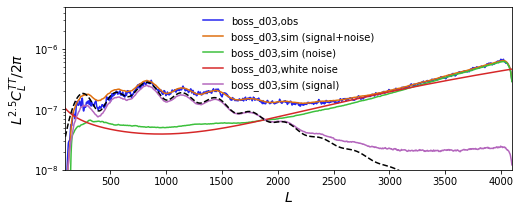

In [24]:
for q in qids:
    pl.plot_1dstyle(fsize=[8,3],xmin=100,xmax=4096,ymin=1e-8,ymax=5e-6,xlab=r'$L$',ylab=r'$L^{2.5} C^{TT}_L/2\pi$',ylog=True)
    l = aobj[q].l
    s = l**3/2./np.pi
    wnl = (60.*np.pi/10800./2.726e6)**2*(1.+5.*(1000./l)**3.5)
    plot(l,s*ocl[q],label=q+',obs')
    plot(l,s*mcl[q],label=q+',sim (signal+noise)')
    plot(l,s*ncl[q],label=q+',sim (noise)')
    plot(l,s*wnl,label=q+',white noise')
    plot(l,s*(mcl[q]-ncl[q]),label=q+',sim (signal)')
    plot(l,s*aobj[q].lcl[0,:],color='k',ls='--')
    legend()
    show()

In [ ]:
for q in qids:
    pl.plot_1dstyle(fsize=[8,3],xmin=100,xmax=4096,ymin=.9,ymax=3,xlab=r'$L$',ylab=r'$C^{TT}_L$')
    l = aobj[q].l
    plot(l,vcl[q]/(mcl[q]+1e-30)*np.sqrt(l+0.5),label=q+',sim (signal+noise)')
    plot(l,vsl[q]/(scl[q]+1e-30)*np.sqrt(l+0.5),label=q+',sim (signal)')
    plot(l,vnl[q]/(ncl[q]+1e-30)*np.sqrt(l+0.5),label=q+',sim (noise)')
    legend()
    axhline(1,color='k',ls='--')
    axhline(2,color='k',ls='--')
    show()

In [ ]:
mb = bn.multipole_binning(20,lmin=100,lmax=4096)
for q in qids:
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj[q].fcls['c'][:10],cn=1)
    #cor = pl.plot_corr(scb,mb.bc,output=True)
    #print(cor)
    pl.plot_1dstyle(grid=True,xmin=100,xmax=4096,ymin=-10,ymax=10,ylab=r'$\Delta C/\sigma$')
    errorbar(mb.bc,(ocb-mcb)/vcb,yerr=vcb/vcb,fmt='o',label=q)
    plot(mb.bc,100*(ocb/mcb-1))
    axhline(0,color='k')
    legend()
    show()
    clf()